# Exam Samuele Pio Lipani

In [21]:
library(dplyr) # Library for operators

In [22]:
data <- c(120,122,121,108,133,119,136,108,106,105,122,139,
          133,115,104,94,118,93,102,114,123,125,124,108,
          111,134,107,107,112,109,125)

Given a set of $n=30$ measurements $D=\{y_i\}$, from Bayes’ theorem: 

$$
P(\mu| D, \sigma) \propto P(D|\mu,\sigma) \times P(\mu|\sigma)
$$

We assume that data are independent, i.e. a measurement of one datum does not interfere on the outcome of another (given $\mu$ and $\sigma$). Hence, the **Likelihood** of the data is:

$$
P(D|\mu\sigma) = \prod_j P(y_j |\mu,\sigma) = \prod_j \frac{1}{\sigma \sqrt{2\pi}} \exp \Big[ \frac{(y_j-\mu)^2}{2 \sigma^2} \Big]
$$

Let us assume our **Prior** has a **Normal** shape with mean $m$ and variance $s^2$, $N(m,s^2)$:

$$
G(\mu|m,s) \propto \exp \Big[ - \frac{1}{2s^2} (\mu-m)^2 \Big]
$$

The shape of the **Likelihood** is:

$$
f(y|\mu,\sigma) \propto \exp \Big[ - \frac{1}{2\sigma^2} (y-\mu)^2 \Big]
$$

The product LikelihoodxPrior becomes:

$$
f(y|\mu,\sigma) \times G(\mu|m,s) \propto \exp-\frac{1}{2}\Big[ \frac{(y-\mu)^2}{\sigma^2}+\frac{(\mu-m)^2}{s^2} \Big]
$$

With little algebra, it can be seen that the Posterior is a Normal distribution itself with mean and variance given by:

$$
m' = \frac{\sigma^2 m + s^2 y}{\sigma^2+s^2} \qquad (s')^2 = \frac{\sigma^2 s^2}{\sigma^2 + s^2}
$$

With the definition $\bar{y} = \frac{1}{N} \sum_j y_j $ it is possible to demonstrate that:

$$
m'= \frac{1/s^2}{N/\sigma^2 + 1/s^2} m + \frac{N/\sigma^2}{N/\sigma^2 + 1/s^2} \bar{y} \qquad \frac{1}{(s')^2} = \frac{\sigma^2+Ns^2}{\sigma^2s^2} 
$$

In [20]:
# settings of the problem

n <- 30
mu <- seq(100,140,length.out=n)

N <- length(data)
y.bar <- mean(data)

sigma.sq <- (15**2)
s.sq <- (15**2)
m <- 120

mu.post <- (1/s.sq) / (N/sigma.sq + 1/s.sq) * m + (N/sigma.sq) / (N/sigma.sq + 1/s.sq) * y.bar
sd.sq.post <- (sigma.sq * s.sq) / (sigma.sq + N * s.sq)

# Prior
norm.prior <- dnorm(mu,mean=m,sd=sqrt(s.sq))

# Determine the Posterior 
norm.post <- dnorm(mu,mean=mu.post,sd=sqrt(sd.sq.post))

# Normalize Posterior
# (we renormalize the posterior because the Prior is 0 outside the interval of mu, while the Posterior is normalized in -inf,+inf)
norm.post <- norm.post/(delta.mu*sum(norm.post))

cat("Posterior mean: ",mu.post,'\n')
cat("Posterior sd  : ",sqrt(sd.sq.post),'\n')


Posterior mean:  116.1562 
Posterior sd  :  2.65165 


In [11]:
# since we are talking about a gaussian posterior we can use the property of a gaussian of being integrated
# for the 95% of its area if we consider an interval of mu +- 2*sigma
x1 <- mu.post - 2 * sqrt(sd.sq.post)
x2 <- mu.post + 2 * sqrt(sd.sq.post)

cat("x1",x1,'\n')
cat("x2",x2)

x1 110.8529 
x2 121.4596

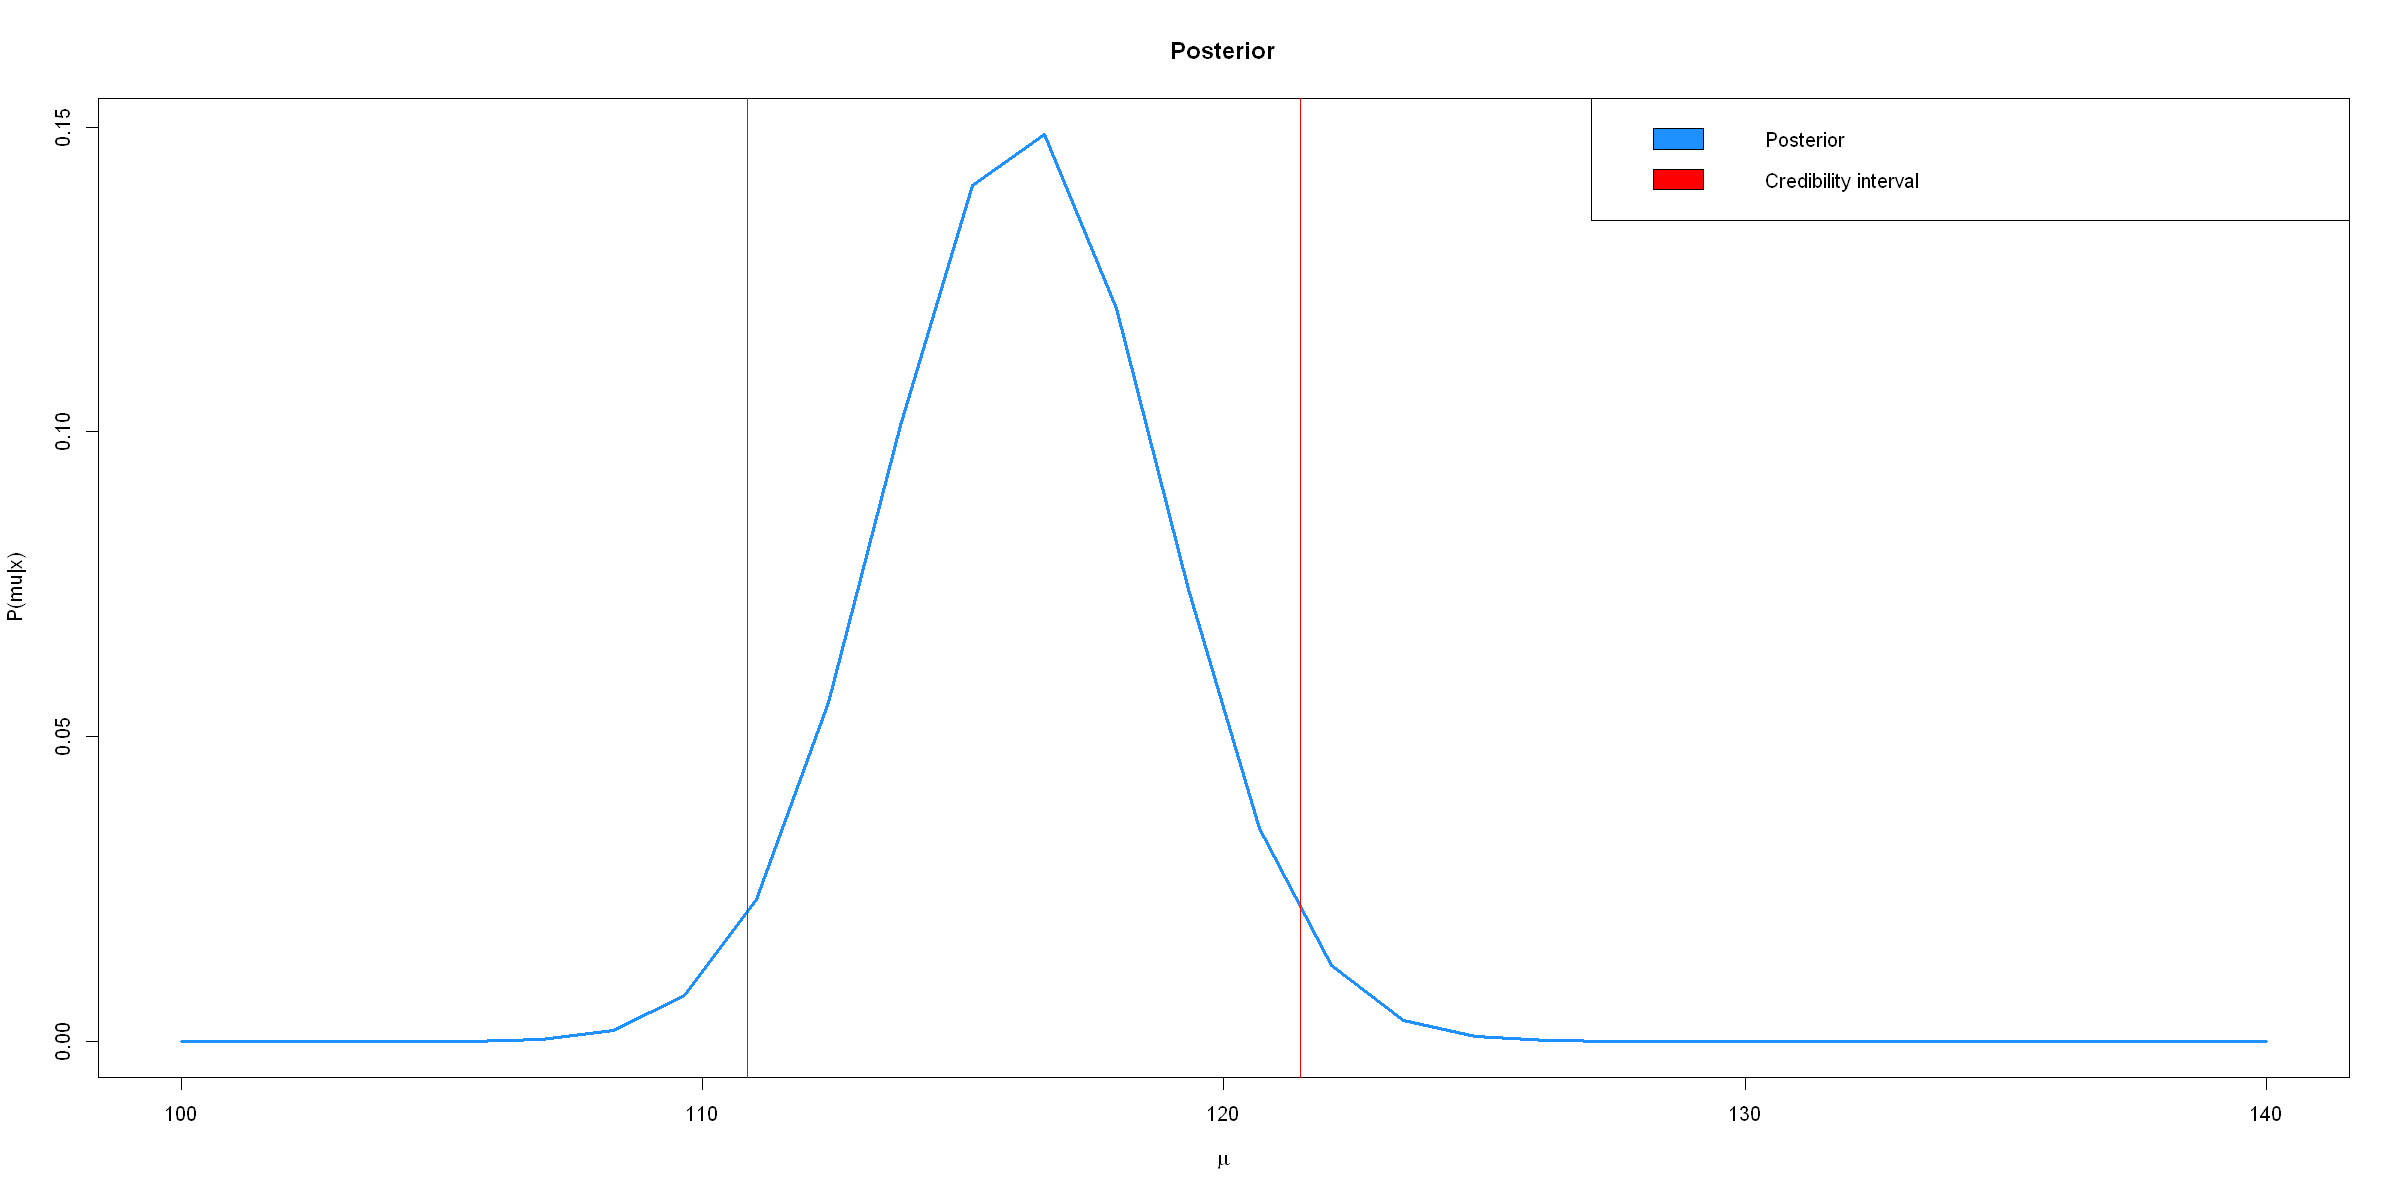

In [19]:
plot(mu,norm.post, type="l", col="dodgerblue", lwd=3,xlab=expression(mu),ylab="P(mu|x)", 
     main="Posterior")
abline(v = x1, col="red")
abline(v = x2, col="red")
legend("topright",legend=c("Posterior", "Credibility interval"), col=c("dodgerblue","red"),fill=c("dodgerblue","red"))

In [6]:
# Compute the hyphotesis testing 
p0 <- 130
post <- function(x){dnorm(x, mu.post, sqrt(sd.sq.post)) } 
result <- integrate(post, lower=0, upper=p0)

result

0.9999999 with absolute error < 2.8e-07

Since `result` is higher than the 5% significance level we cannot reject the null hypothesis.